# Test that position data and instantaneous firing rate data matches

We want to get ifr and behavioral data together and learn how to analyze this type of data.

In [16]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 40 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


 35%|███████████████                            | 14/40 [00:06<00:11,  2.21it/s]


KeyboardInterrupt: 

In [2]:
ses = myProject.sessionList[-1]
sSes = sSesList[-1]


In [3]:
ses.path

'/adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106'

In [4]:
## create a list of autopipy.Trial objects
ses.createTrialElectroList() # create a List of TrialElectro object
ses.loadLogFile()
ses.extractTrialElectroFeatures(sSes.ap.pose)
print(ses.nTrials, ses.nJourneys)

/home/kevin/repo/autopipy/autopipy/navPath.py:127: RuntimeWarning: divide by zero encountered in true_divide
  self.speed=mv3/timeDiff


mn9686-01112021-0106_61, start time adjustment: -6.5549 sec
No time on the arena, can't cut at last arena bridge transition


/home/kevin/repo/autopipy/autopipy/navPath.py:95: RuntimeWarning: All-NaN slice encountered
  self.distanceRunProp = self.distanceRun/np.nanmax(self.distanceRun)


no data point at periphery
Could not find a homingPath in j.navPaths.keys()
160 265


In [5]:
def load_ifr_behavior(ses):
    """
    Load data files for a session that we need to correlate ifr and navpath variables
    
    ifr_autopi.pkl: the instantaneous firing rate of all neurons as a function of time. 
    navPathSummary.csv: description of navPath that can be analyzed
    navPathInstan.csv: contains variables that changes within a single navPath (e.g., distance run and speed)
    
    """
    fn = ses.path+"/ifr_autopi.pkl"
    print("loading",fn)
    with open(fn, 'rb') as intp:
        ifr = pickle.load(intp)
    
    fn = ses.path+"/navPathSummary.csv"
    print("loading",fn)
    navPathSummary = pd.read_csv(fn)
    navPathSummary
    
    fn = ses.path+"/navPathInstan.csv"
    print("loading",fn)
    navPathInstan = pd.read_csv(fn)
    navPathInstan
    
    
    # all the timeRes values in our navPathInstan should be in IFR time array
    intol = isin_tolerance(navPathInstan.timeRes,ifr[1],tol=0.00001)
    if np.sum(intol) != navPathInstan.shape[0]:
        raise ValueError("Not all values of the navPathInstan are in the ifr time")
    
    
    
    return ifr, navPathSummary, navPathInstan

In [6]:
ifr, navs, inav = load_ifr_behavior(ses)

loading /adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106/ifr_autopi.pkl
loading /adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106/navPathSummary.csv
loading /adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106/navPathInstan.csv


In [7]:
navs

,name,trial,trialNo,journey,type,light,nLeverPresses,startTimeRos,endTimeRos,startTimeRes,endTimeRes
0,mn9686-01112021-0106_1-0_all,mn9686-01112021-0106_1,1,0,all,light,1,1.635781e+09,1.635781e+09,3057.72,3066.90
1,mn9686-01112021-0106_1-0_searchPath,mn9686-01112021-0106_1,1,0,searchPath,light,1,1.635781e+09,1.635781e+09,3057.72,3065.70
2,mn9686-01112021-0106_1-0_searchToLeverPath,mn9686-01112021-0106_1,1,0,searchToLeverPath,light,1,1.635781e+09,1.635781e+09,3057.72,3065.38
3,mn9686-01112021-0106_1-0_homingPath,mn9686-01112021-0106_1,1,0,homingPath,light,1,1.635781e+09,1.635781e+09,3065.72,3066.90
4,mn9686-01112021-0106_1-0_homingFromLeavingLever,mn9686-01112021-0106_1,1,0,homingFromLeavingLever,light,1,1.635781e+09,1.635781e+09,3066.06,3066.90
...,...,...,...,...,...,...,...,...,...,...,...
904,mn9686-01112021-0106_160-1_all,mn9686-01112021-0106_160,160,1,all,dark,1,1.635786e+09,1.635786e+09,8390.98,8393.80
905,mn9686-01112021-0106_160-1_searchPath,mn9686-01112021-0106_160,160,1,searchPath,dark,1,1.635786e+09,1.635786e+09,8390.98,8391.76
906,mn9686-01112021-0106_160-1_searchToLeverPath,mn9686-01112021-0106_160,160,1,searchToLeverPath,dark,1,1.635786e+09,1.635786e+09,8390.98,8391.32
907,mn9686-01112021-0106_160-1_homingPath,mn9686-01112021-0106_160,160,1,homingPath,dark,1,1.635786e+09,1.635786e+09,8391.78,8393.80


In [8]:
inav

,name,trialNo,timeRos,timeRes,iTime,iTimeProp,distance,distanceProp,speed,x,y,targetDistance,targetToAnimalX,targetToAnimalY
0,mn9686-01112021-0106_1-0_all,1,1.635781e+09,3057.72,0.000000,0.000000,0.226477,0.000939,10.469781,-1.547535,-42.772820,49.415138,-0.886454,-49.407187
1,mn9686-01112021-0106_1-0_all,1,1.635781e+09,3057.74,0.021631,0.002355,0.521394,0.002163,11.984293,-1.505792,-42.550224,49.191843,-0.844711,-49.184590
2,mn9686-01112021-0106_1-0_all,1,1.635781e+09,3057.76,0.046240,0.005035,0.817749,0.003392,13.761295,-1.477743,-42.256644,48.897830,-0.816662,-48.891010
3,mn9686-01112021-0106_1-0_all,1,1.635781e+09,3057.78,0.067775,0.007380,1.209617,0.005018,20.032589,-1.470911,-41.960367,48.601481,-0.809830,-48.594734
4,mn9686-01112021-0106_1-0_all,1,1.635781e+09,3057.80,0.087337,0.009510,1.694762,0.007030,30.082162,-1.502748,-41.569795,48.211509,-0.841667,-48.204161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161999,mn9686-01112021-0106_160-1_homingFromLeavingLever,160,1.635786e+09,8393.72,1.553207,0.943976,60.902681,0.979625,23.898290,-5.319594,-41.838483,17.641559,-1.694685,-17.559973
162000,mn9686-01112021-0106_160-1_homingFromLeavingLever,160,1.635786e+09,8393.74,1.572956,0.955979,61.352419,0.986859,23.970238,-4.879502,-42.008984,17.774807,-1.254593,-17.730475
162001,mn9686-01112021-0106_160-1_homingFromLeavingLever,160,1.635786e+09,8393.76,1.591719,0.967382,61.770007,0.993576,22.958005,-4.465752,-42.185265,17.926487,-0.840843,-17.906756
162002,mn9686-01112021-0106_160-1_homingFromLeavingLever,160,1.635786e+09,8393.78,1.609908,0.978436,62.169367,1.000000,11.255768,-4.091358,-42.370221,18.097724,-0.466449,-18.091712


## Developing NeuronAutopi to encapsulate the code to correlate firing rate and task variables

NeuronAutopi class takes the ifr of a single neuron and the behavioral data

In [9]:
from neuronAutopi import NeuronAutopi

Create a list of conditions that we want to analyze.timeRes

In [10]:
myList=[{"navPathType":"searchPath","light":"light","behavioralVariable":"distance","title":"Search-Light","bins":np.arange(0,70,2)},
        {"navPathType":"searchPath","light":"dark","behavioralVariable":"distance","title":"Search-Dark","bins":np.arange(0,70,2)},
        {"navPathType":"homingPath","light":"light","behavioralVariable":"distance","title":"Homing-Light","bins":np.arange(0,70,2)},
        {"navPathType":"homingPath","light":"dark","behavioralVariable":"distance","title":"Homing-Dark","bins":np.arange(0,70,2)},
        
        {"navPathType":"searchPath","light":"light","behavioralVariable":"iTime","title":"Search-Light","bins":np.arange(0,3,0.1)},
        {"navPathType":"searchPath","light":"dark","behavioralVariable":"iTime","title":"Search-Dark","bins":np.arange(0,3,0.1)},
        {"navPathType":"homingPath","light":"light","behavioralVariable":"iTime","title":"Homing-Light","bins":np.arange(0,3,0.1)},
        {"navPathType":"homingPath","light":"dark","behavioralVariable":"iTime","title":"Homing-Dark","bins":np.arange(0,3,0.1)},
        
        {"navPathType":"searchPath","light":"light","behavioralVariable":"targetDistance","title":"Search-Light","bins":np.arange(6,60,2)},
        {"navPathType":"searchPath","light":"dark","behavioralVariable":"targetDistance","title":"Search-Dark","bins":np.arange(6,60,2)},
        {"navPathType":"homingPath","light":"light","behavioralVariable":"targetDistance","title":"Homing-Light","bins":np.arange(6,60,2)},
        {"navPathType":"homingPath","light":"dark","behavioralVariable":"targetDistance","title":"Homing-Dark","bins":np.arange(6,60,2)},
       ]    


In [11]:
def summaryPlotOneNeuron(sSes,ses,ifr,navPathSummary,inav,trialElectro,neuronIndex,conditionList):
    """
    Summary plot for one neuron
    """
    na = NeuronAutopi(ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navPathSummary,iNavPath=inav,trialElectro=trialElectro)
    n = sSes.cg.neuron_list[neuronIndex]
    
    
    fig,axes = plt.subplots(6,8,figsize=(30,30))
    for i,d in enumerate(conditionList):
        nPlotsPerCond=4
        r = int(i/2)
        c = i%2*nPlotsPerCond

        # calculate the matrix for this condition
        na.navPathBehavioralMatrix(navPathType=d["navPathType"],light=d["light"],nLeverMin=1,behavioralVariable=d["behavioralVariable"],bins=d["bins"])

        # paths
        ax = axes[r,c]
        na.plotNavPath(ax,navPathType=d["navPathType"],light=d["light"],title="{} {}".format(neuronIndex,d["title"]))  

        # firing rate map
        ax = axes[r,c+1]
        inter =na.navPathResTimeInterval(navPathType=d["navPathType"],light=d["light"],nLeverMin = 1)
        xy_range=np.array([[-50,-50],[50,50]])
        sSes.ap.set_intervals(inter)
        n.spike_train.set_intervals(inter)
        n.spatial_properties.firing_rate_map_2d(cm_per_bin =3, smoothing_sigma_cm = 3, smoothing=True,xy_range=xy_range)
        ax.imshow(n.spatial_properties.firing_rate_map.T,origin="lower",cmap="jet")
        ax.set_title(d["title"]+" {:.2f} Hz".format(np.nanmax(n.spatial_properties.firing_rate_map)))

        # matrix
        ax = axes[r,c+2]
        na.plotNavPathBehavioralMatrix(ax,navPathType=d["navPathType"],light=d["light"],behavioralVariable=d["behavioralVariable"],title = d["title"])

        # mean of matrix
        ax = axes[r,c+3]
        na.plotNavPathBehavioralMatrixMean(ax,navPathType=d["navPathType"],light=d["light"],behavioralVariable=d["behavioralVariable"],title = d["title"])
 
    
    

In [14]:
neuronIndex = 0
na = NeuronAutopi(ifr = (ifr[0][neuronIndex,:],ifr[1]),navPathSummary=navs,iNavPath=inav,trialElectro=ses.trialList[0])
n = sSes.cg.neuron_list[neuronIndex]

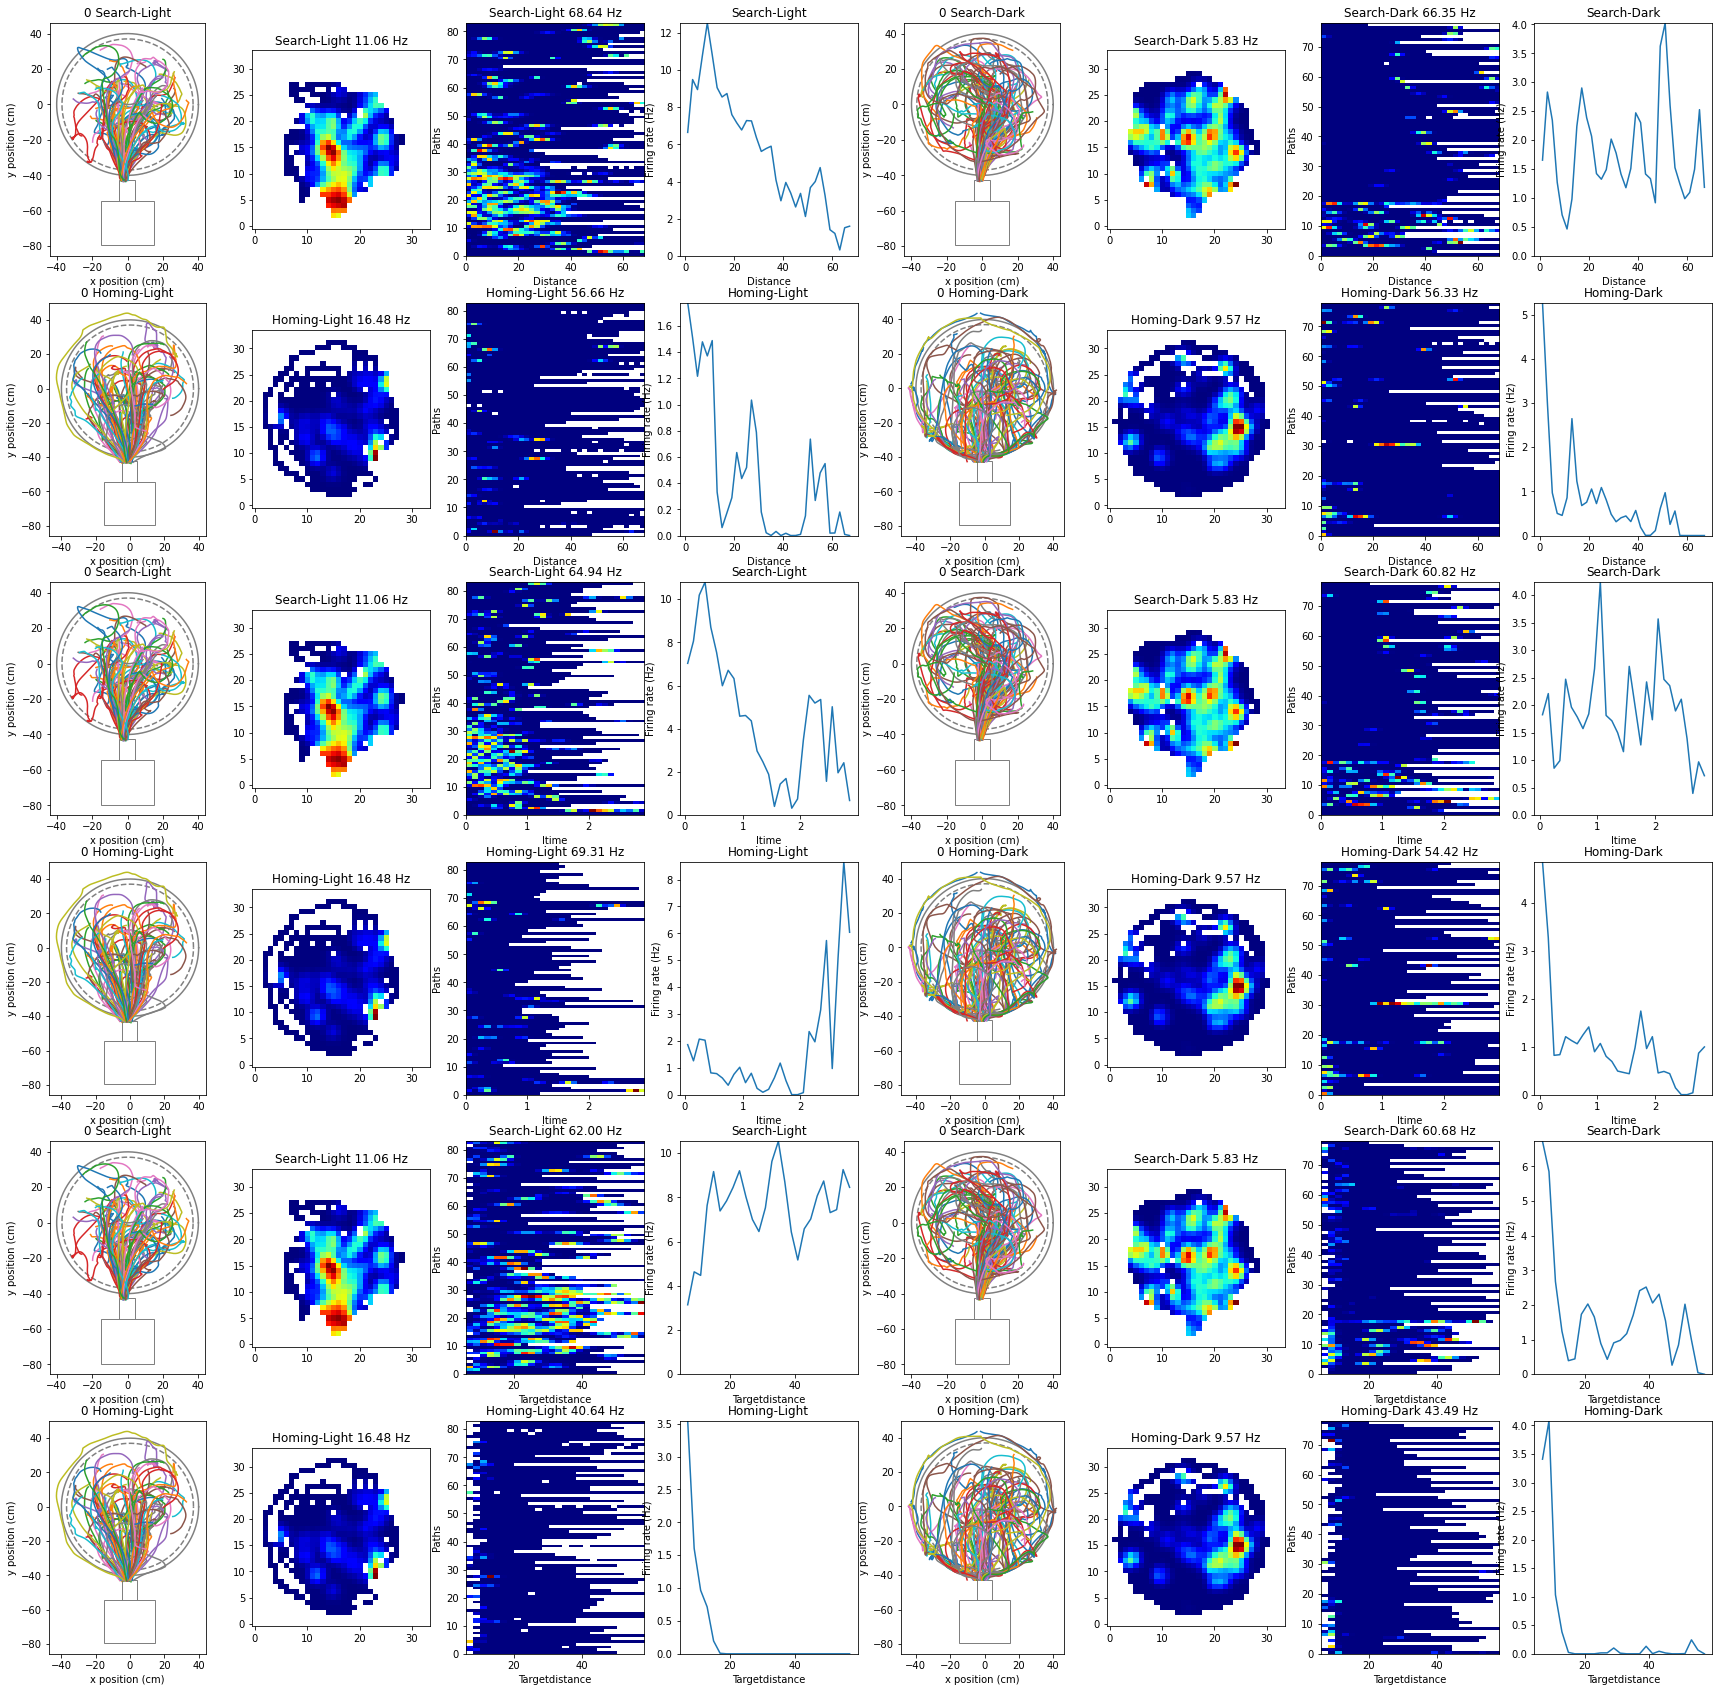

In [15]:
summaryPlotOneNeuron(sSes,ses,ifr,navs,inav,ses.trialList[0],neuronIndex,conditionList=myList)
fn = "{}{}{}{}".format(ses.path,"/trial_by_trial_maps_",neuronIndex,".pdf")
plt.savefig(fn)

In [233]:
from matplotlib.backends.backend_pdf import PdfPages

figName=ses.path+"/singleTrialRate.pdf"
print("saving in",figName)

with PdfPages(figName) as pdf:
    for neuronIndex in tqdm(range(len(sSes.cg.neuron_list))):
        summaryPlotOneNeuron(sSes,ses,ifr,navs,inav,ses.trialList[0],neuronIndex)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

saving in /adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106/singleTrialRate.pdf


100%|███████████████████████████████████████████| 62/62 [23:26<00:00, 22.69s/it]
